# Get config for spherix

This notebook will allow visualization of the dataset and generate the config txt file to use with the spherix library.

HOW TO RUN:

1) Run the generate_dset.py script. Check the sumocfg scenario in the script to ensure the correct SUMO scenario is run. Ensure that the simulation is run long enough to collect enough number of trajectories.

2) Run the notebook trajectory_preprocessor.ipynb to extract training set. Choose the number of vehicle trajectories to extract (should be at least 200)!

3) Run this notebook. Ensure that the number of trajectories to sample (again) is reasonable (should be less than the number input in 2)).

In [1]:
import pickle
import numpy as np
from matplotlib import pyplot as plt

In [2]:
with open('traj_cont_intersex.pkl', 'rb') as f: 
    z_mat = pickle.load(f)
print('Trajectory file loaded!')

Trajectory file loaded!


In [3]:
import skfda
from skfda.preprocessing.dim_reduction.projection import FPCA
fdx = skfda.FDataGrid(z_mat, np.arange(z_mat.shape[1]))
fpcax = FPCA(n_components=5)
fpcax.fit(fdx)

 c:\Users\nxf67027\Anaconda3\envs\liberty\lib\site-packages\numba\np\ufunc\parallel.py:366: NumbaWarning:The TBB threading layer requires TBB version 2021 update 1 or later i.e., TBB_INTERFACE_VERSION >= 12010. Found TBB_INTERFACE_VERSION = 6103. The TBB threading layer is disabled.


FPCA(n_components=5, weights=array([0.5, 1. , 1. , ..., 1. , 1. , 0.5]))

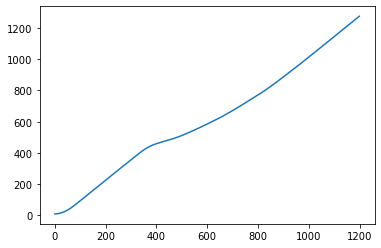

In [4]:
mean_x = fpcax.mean_.data_matrix.ravel()
plt.plot(mean_x)

In [5]:
basis_x = fpcax.components_.data_matrix.reshape(fpcax.components_.data_matrix.shape[:2])

In [6]:
scores_x = fpcax.transform(fdx)

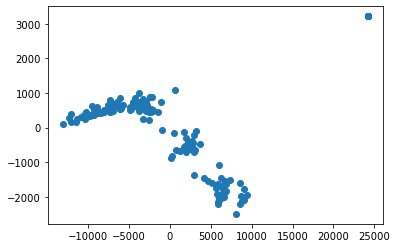

In [7]:
plt.scatter(scores_x[:,0], scores_x[:,1])

In [12]:
scores_x_var = np.var(scores_x, axis = 0)
scores_x_var

array([7.17649275e+07, 1.64921899e+06, 6.18548142e+05, 6.24174555e+04,
       3.97940433e+04])

Start writing to the config file

In [36]:
def vector_to_text(v):
    line_to_write = ''
    for m in v:
        line_to_write += (str(m) + ',')
    line_to_write = line_to_write[:len(line_to_write)-1]
    return line_to_write

In [37]:
file1 = open("spherixcfg.txt", "w") 
# first, write the mean_x
file1.write(vector_to_text(mean_x) + '\n')
# second, write the basis_x
for i in range(basis_x.shape[0]):
    file1.write(vector_to_text(basis_x[i,:]) + '\n')
# third, write the PCA scores covariance matrix
pca_scores_cov_x = np.diag(scores_x_var)
for i in range(basis_x.shape[0]):
    file1.write(vector_to_text(pca_scores_cov_x[i,:]) + '\n')
# finally, write the measurement error
file1.write(str(0.0001))
file1.close() 

Get one trajectory

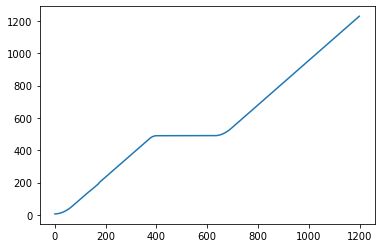

In [10]:
plt.plot(z_mat[22,:])

In [11]:
scores_x[22,:]

array([1790.38776559, -528.15598063, 1052.20144814, -190.65637709,
        377.13755214])

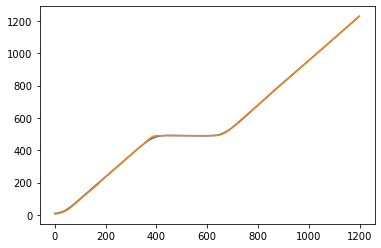

In [22]:
# trj_apprx = basis_x.T @ scores_x[69,:].reshape((5,1)) + mean_x.reshape((60,1)) 
trj_apprx = basis_x.T @ np.array([[1790.38776559, -528.15598063, 1052.20144814, -190.65637709,
        377.13755214]]).T + mean_x.reshape((-1,1))
trj_true = z_mat[22,:]

plt.plot(trj_apprx)
plt.plot(trj_true)

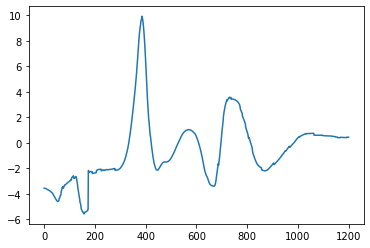

In [37]:
apprx_err = trj_true - trj_apprx.reshape((-1))
plt.plot(apprx_err)

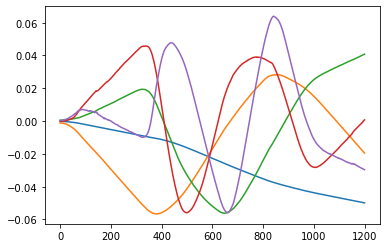

In [40]:
for i in range(basis_x.shape[0]):
    plt.plot(basis_x[i,:])